# VISOR de EXTRACCiÓN en Longitudes (Eles)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json


In [2]:
#signals = ["E:/das/2021-11-30_Medidas/signals1.json"]
signals = ["E:/das/2021-11-30_Medidas/se1.json"]

#load every json file in signals and concatenate data
data = []
for signal in signals:
    with open(signal) as f:
        data.extend(json.load(f))

print(len(data))   
    
#foreach row get signal as 2d array
signals = []
vids = []
ds = []
for row in data:
    signal = np.array(row['Signal'])
    vid = row['VehicleID']
    d = row['Distance']
    if signal.shape[0] != 300:
        pass
    vids.append(vid)
    signals.append(signal)
    ds.append(d)

shapes = {arr.shape for arr in signals}
signals = np.stack(signals)


9251


In [3]:
#pring signals shape
print(signals.shape)
#remove signals with are proximun in distance and time


#remove signals with less than 1 of theis abs of axis 1
signalsf = signals[np.abs(signals).sum(axis=1) > 50]

print (signalsf.shape)

(9251, 400)
(1381, 400)


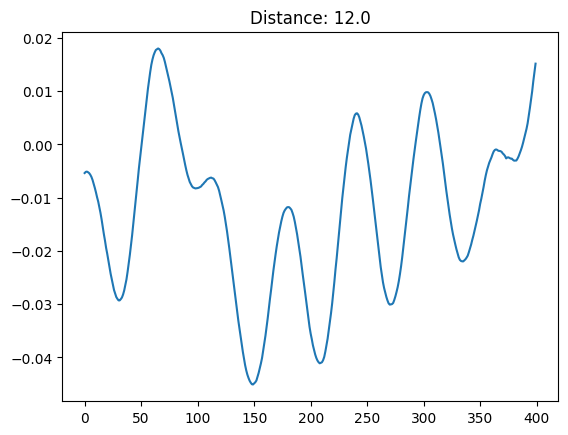

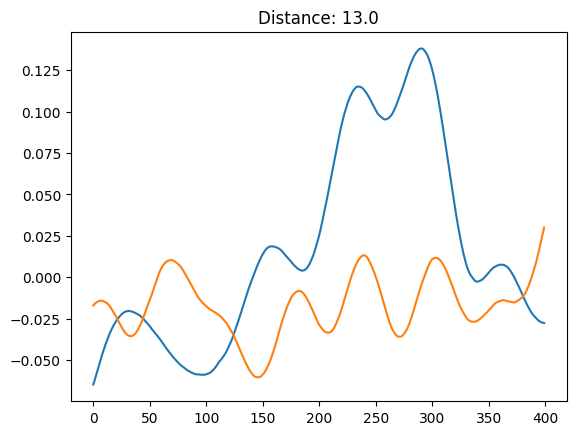

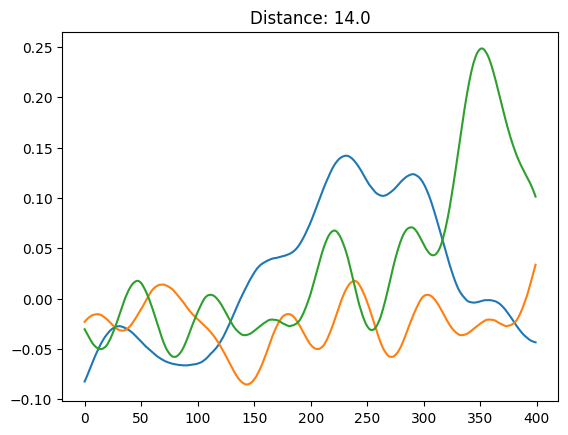

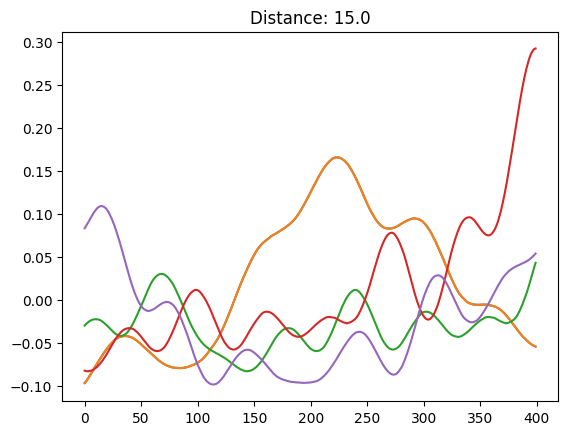

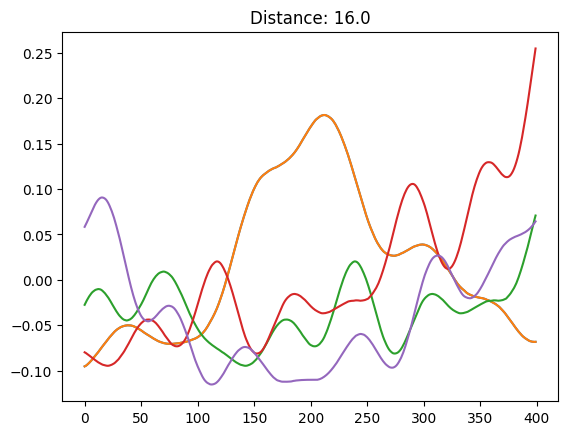

In [4]:
#dataframe with signals, vehicleids and distances
df = pd.DataFrame({'vid': vids, 'd': ds, 'signal': signals.tolist()})
#group signals by distance
dfg = df.groupby('d')
#plot 10 signals by distance
for i, (d, group) in enumerate(dfg):
    if i == 5:
        break
    plt.figure()
    plt.title(f'Distance: {d}')
    for signal in group['signal'].values:
        plt.plot(signal)
    plt.show()

#save all figures by distance
for i, (d, group) in enumerate(dfg):
    plt.figure()
    plt.title(f'Distance: {d}')
    for signal in group['signal'].values:
        plt.plot(signal)
        #y range from -1.25 to 1.25
        plt.ylim(-1.25, 1.25)
    plt.savefig(f'e:/temp/s/signals_{d}.png')
    plt.close()




